## **Actividad Final del Módulo Ciencia de Datos e Inteligencia Artificial**

### **Alumno:** Velasteguí Izurieta Homero Javier
### **Programa:** Especialización en Programación con Python
### **Tema:** Detección de Ataques en Tráfico de Red


El presente proyecto utiliza el dataset [Cybersecurity 🪪 Intrusion 🦠 Detection Dataset](https://www.kaggle.com/datasets/dnkumars/cybersecurity-intrusion-detection-dataset) para entrenar un modelo de clasificación que permite identificar si un paquete determinado es malicioso o no.

Este conjunto de datos integra características basadas tanto en el comportamiento de red como en la actividad del usuario. Entre las variables de red más relevantes se incluyen el tamaño del paquete (network_packet_size), el tipo de protocolo de comunicación (protocol_type), y el tipo de cifrado utilizado (encryption_used).

Adicionalmente, el conjunto de datos incorpora variables de comportamiento del usuario, como la cantidad de intentos de inicio de sesión (login_attempts), duración de la sesión (session_duration), número de accesos fallidos (failed_logins), accesos fuera del horario habitual (unusual_time_access), reputación de la dirección IP (ip_reputation_score) y tipo de navegador utilizado (browser_type). Estas variables permiten modelar con mayor precisión actividades atípicas que podrían corresponder a intentos de intrusión, como ataques de fuerza bruta, accesos persistentes no autorizados, o uso de navegadores automatizados.

La variable objetivo del modelo es attack_detected, una etiqueta binaria que indica si se ha detectado o no un ataque en cada registro. Se utiliza un enfoque supervisado de aprendizaje automático para entrenar el modelo y realizar predicciones basadas en los patrones aprendidos.

### **1.- Importar Dataset y Librerías Necesarias** 
El dataset se descargó desde [Kaggle](https://www.kaggle.com/datasets/dnkumars/cybersecurity-intrusion-detection-dataset) y se incluyó dentro de assets con el nombre de cybersecurity_data.csv. Los datos del archivo csv se importan creando un dataset para explorar la información

In [45]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path= os.path.join(".", "assets", "cybersecurity_data.csv")
df_ids=pd.read_csv(path, sep=",") 
display(df_ids.head(2))
display(df_ids.tail(2))
display(len(df_ids))

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0
9536,SID_09537,340,TCP,6,86.876744,NaN,0.277069,4,Chrome,1,1


9537

### **2.- Exploración de los datos**
El dataframe tiene un total de 9537 registros, en donde los índices van desde 0 a 9536. A continuación se explora los datos para identificar el tipo de datos y la existencia de valores nulos.

In [46]:
display(df_ids.describe())
display(df_ids.info())
nulos= df_ids.isnull().sum()
display(nulos)


,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


None

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

### **3.- Tratamiento de los Datos**
La columna encryption_used es la única que tiene valores nulos. Al revisar los datos únicos de la columna encryption_used  y la documentación de origen del dataset, se identifica que los valores nulos en esta columna corresponden a comunicaciones sin cifrado, por lo que se reemplazan los nulos por la cadena "TEXT", que representará las comunicaciones en texto plano.

En la exploración del tipo de datos se identifica que las columnas "session", "protocolo", "encryption", y "browser" no tienen valores numéricos. En estas columnas se revisan sus valores únicos para determinar la viabilidad de codificarlas como variables categóricas. 

Para el id se utiliza len con la finalidad de identificar posibles valores duplicados. Si el valor de len de esta es menor que la cantidad de registros se determinaría que existen sesiones duplicadas. En la exploración se identifica que este no es el caso. Para las columnas complementarias, basados en la documentación se realiza una exploración de sus valores únicos para codificarlos de manera posterior.

In [47]:
encryptions=df_ids["encryption_used"].unique()
display(encryptions)
df_ids["encryption_used"]=df_ids["encryption_used"].fillna("TEXT")
display(len(df_ids["session_id"].unique()))
display(df_ids["protocol_type"].unique())
display(df_ids["encryption_used"].unique())
display(df_ids["browser_type"].unique())

array(['DES', 'AES', nan], dtype=object)

9537

array(['TCP', 'UDP', 'ICMP'], dtype=object)

array(['DES', 'AES', 'TEXT'], dtype=object)

array(['Edge', 'Firefox', 'Chrome', 'Unknown', 'Safari'], dtype=object)

### **4.- Análisis de los Datos**
#### **4.1.- Análisis de Correlación**

attack_detected
0    0.552899
1    0.447101
Name: proportion, dtype: float64


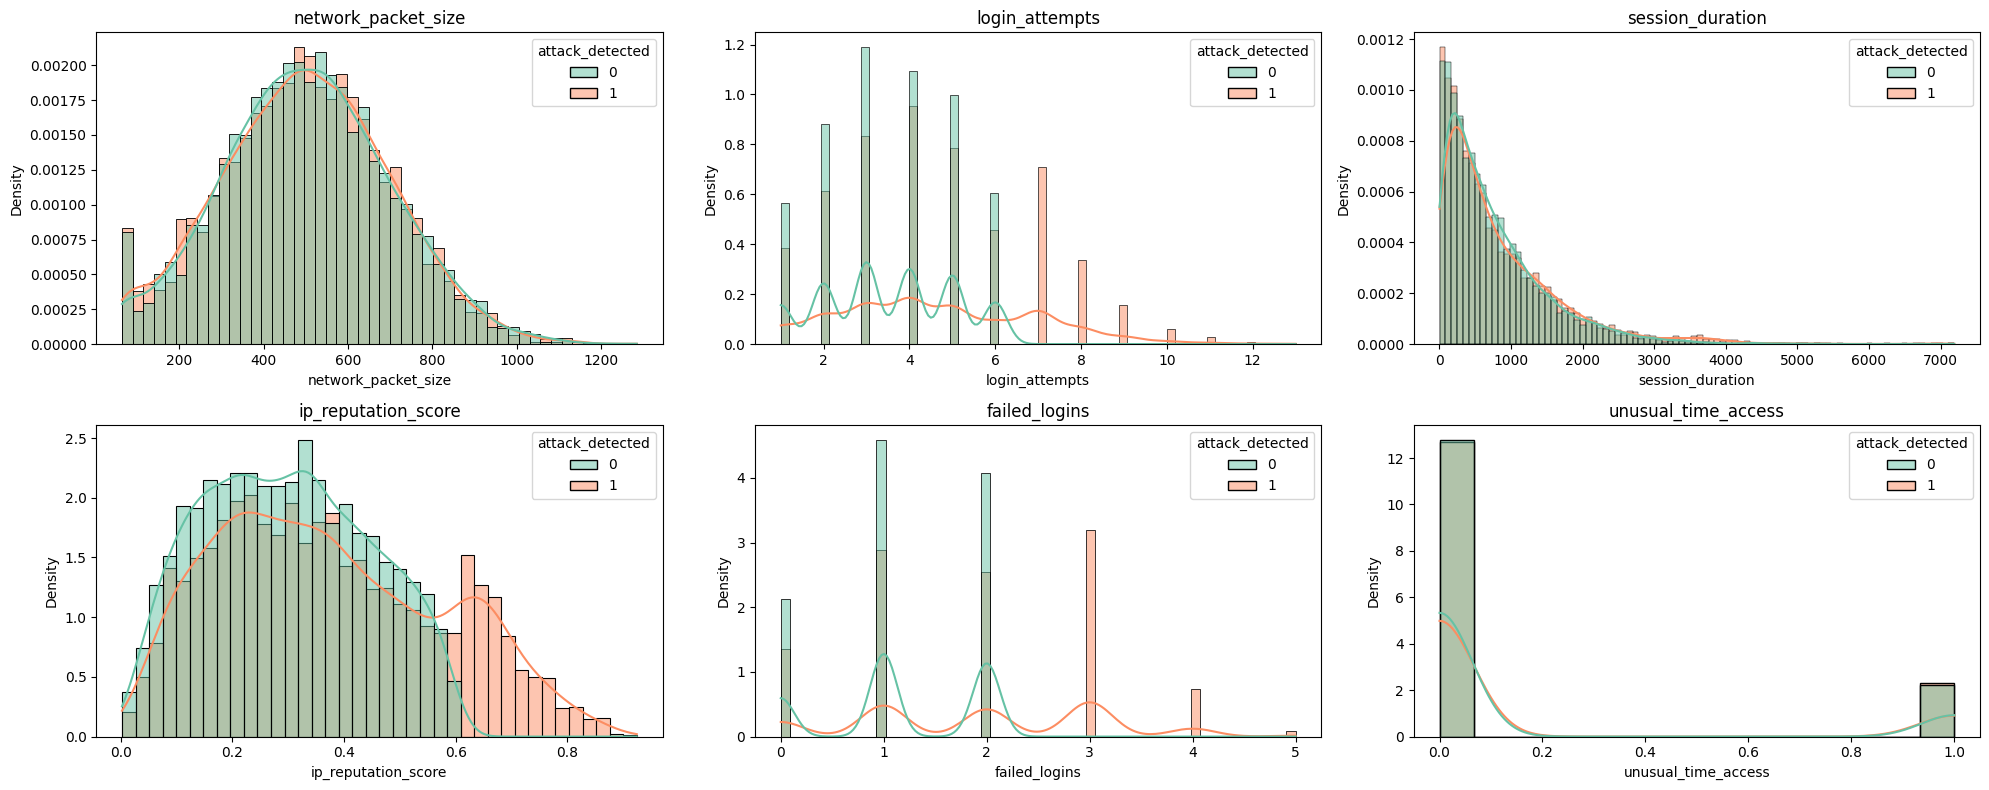

In [48]:
#Verificar el balanceo de los datos:
print(df_ids['attack_detected'].value_counts(normalize=True))

features = df_ids.select_dtypes(include='number').columns.drop('attack_detected')


n = len(features)
cols = 3 
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(features):
    sns.histplot(
        data=df_ids, x=col, hue='attack_detected',
        kde=True, stat='density', common_norm=False,
        palette='Set2', ax=axes[i]
    )
    axes[i].set_title(f'{col}')

# Eliminar ejes vacíos si hay menos plots que subplots creados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **4.2.- Gráfico de Cajas**

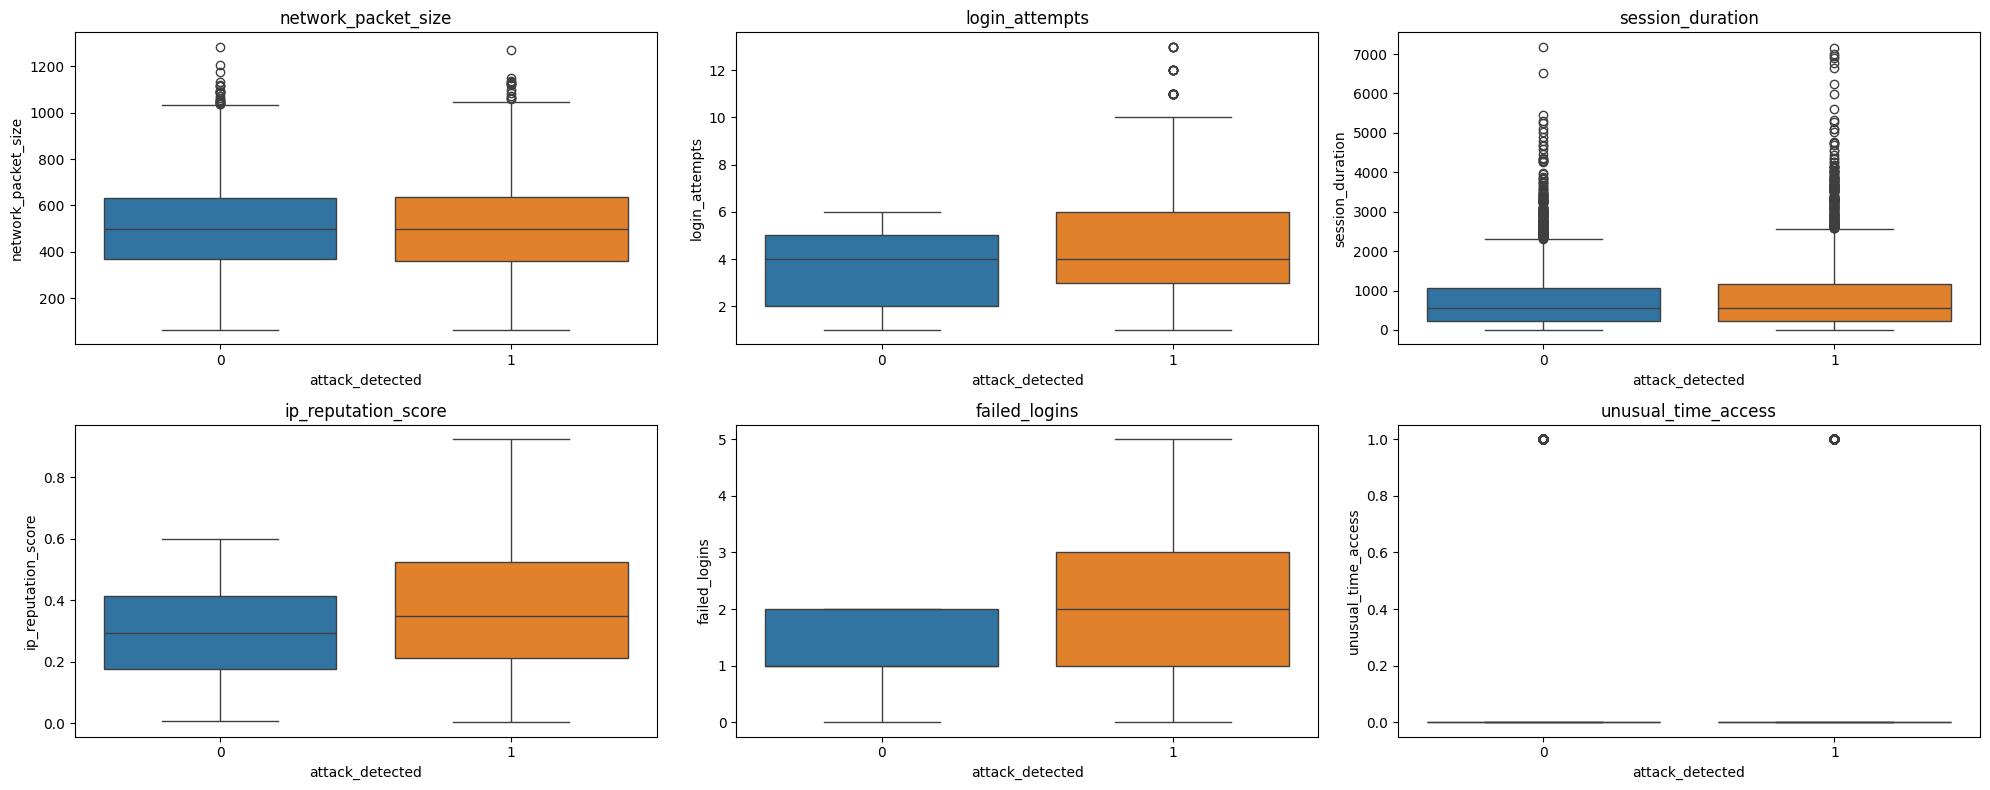

In [50]:
features = df_ids.select_dtypes(include='number').columns.drop("attack_detected")
features

n = len(features)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(data=df_ids, x='attack_detected', y=col, hue='attack_detected', ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].legend_.remove()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### **4.3.- Análisis de Correlación**

<Axes: xlabel='protocol_type', ylabel='attack_detected'>

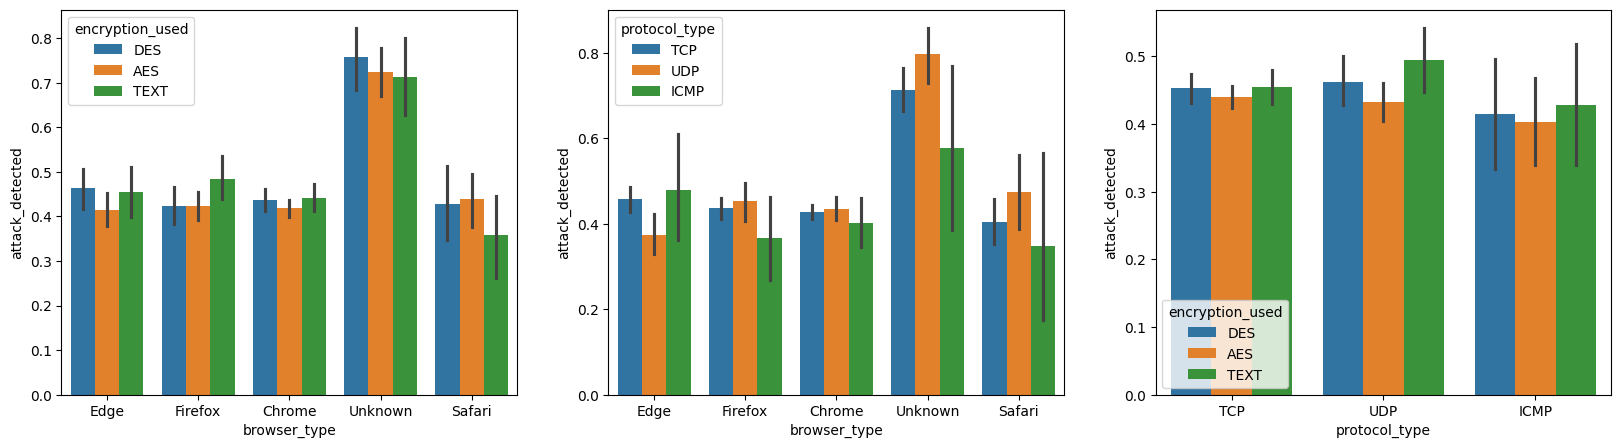

In [51]:
fig, ax= plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(x='browser_type', y='attack_detected', hue='encryption_used', data=df_ids, ax=ax[0])
sns.barplot(x='browser_type', y='attack_detected', hue='protocol_type', data=df_ids, ax=ax[1])
sns.barplot(x='protocol_type', y='attack_detected', hue='encryption_used', data=df_ids, ax=ax[2])

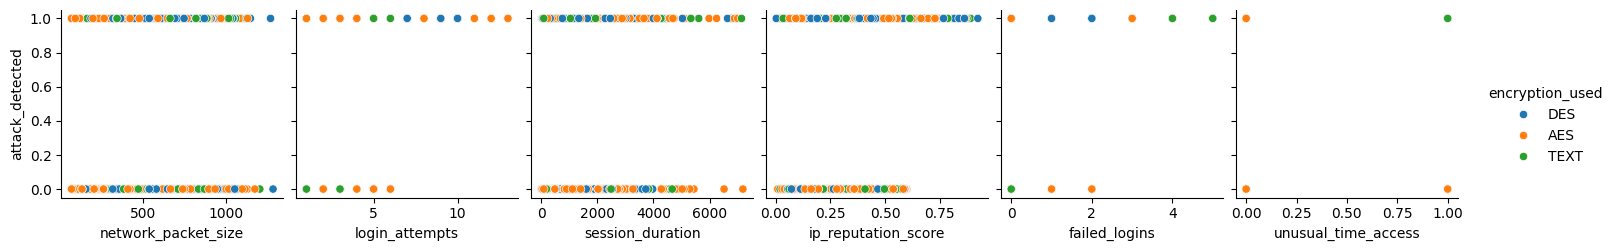

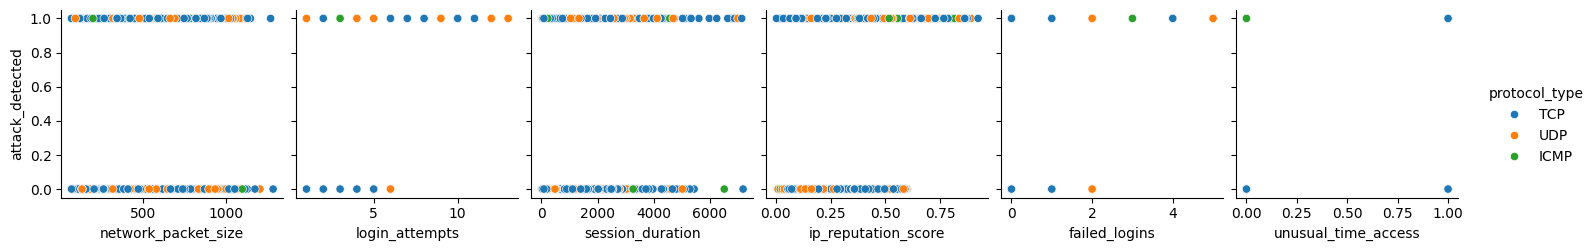

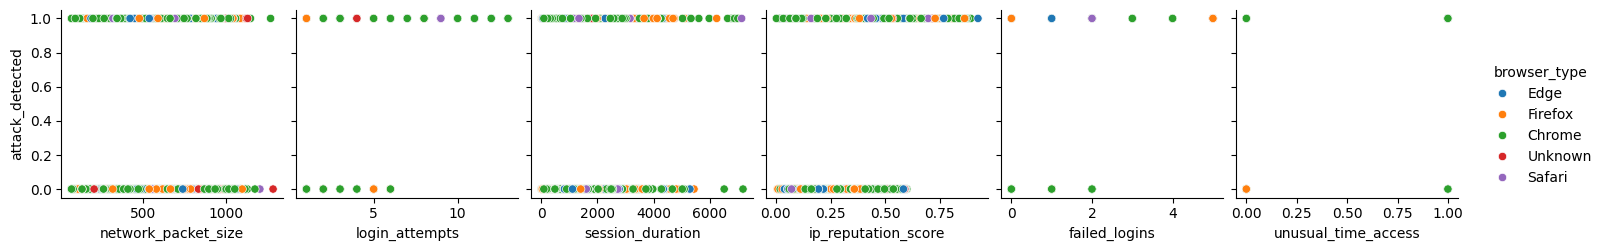

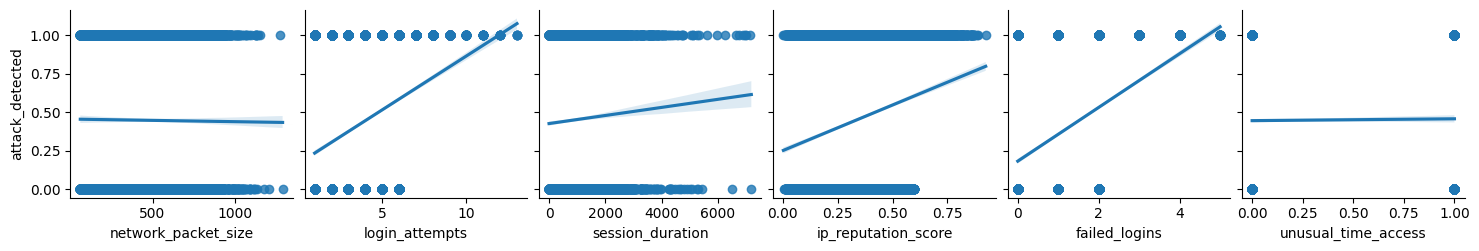

In [52]:
sns.pairplot(df_ids, x_vars=features.tolist(), y_vars='attack_detected', hue='encryption_used')
sns.pairplot(df_ids, x_vars=features.tolist(), y_vars='attack_detected', hue='protocol_type')
sns.pairplot(df_ids, x_vars=features.tolist(), y_vars='attack_detected', hue='browser_type')
sns.pairplot(df_ids, x_vars=features.tolist(), y_vars='attack_detected', kind='reg')

#### **Análisis**

Los intentos de incio de sesión (login_attempts), evidencia que los valores más altos de intentos de inicio de sesión tienden a asociarse con una mayor detección de ataques. Esta relación es bastante clara y consistente a lo largo de los distintos tipos de cifrado, protocolos y navegadores, lo que sugiere que login_attempts es un buen predictor del comportamiento malicioso en el sistema. Es decir, a mayor cantidad de intentos de acceso, mayor probabilidad de que el evento sea clasificado como un ataque.

En la calificación de la reputación de las direcciones (ip_reputation_score), se identifica una fuerte relación entre los valores altos de esta variable (cercanos a 0.6) y la detección de ataques. Al contrario, los valores bajos del puntaje de reputación IP se asocian mayoritariamente con eventos no maliciosos. Esto indica que esta métrica, que probablemente evalúa el historial o confiabilidad de la dirección IP, es uno de los mejores indicadores predictivos de actividad sospechosa o maliciosa.

En cuanto a los inicios de sesión fallidos (failed_logins), algunos valores altos de intentos fallidos (<2) coinciden con la presencia de ataques, existe un considerable solapamiento con eventos legítimos, lo que reduce su poder predictivo individual. Algo similar ocurre con la variable unusual_time_access, ubicada en la cuarta columna. Si bien los accesos realizados en horarios inusuales (valor 1) se relacionan en algunos casos con ataques, la escasez de registros con este valor limita su utilidad como predictor fuerte.

Respecto a las variables categóricas visualizadas mediante los colores de los puntos en cada fila, no se observan patrones claros que relacionen un tipo específico de cifrado, protocolo o navegador con una mayor o menor probabilidad de ataque. Por ejemplo, los ataques y accesos legítimos se distribuyen de forma similar entre los distintos tipos de cifrado (DES, AES, TEXT), protocolos (TCP, UDP, ICMP) y navegadores (Edge, Firefox, Chrome, Unknown, Safari).

En el gráfico de barras se observa que la característica browser, presenta una mayor frecuencia en ataques detectados para navegadores desconocidos, por lo que esta variable si se podría considerar en el entrenamiento del modelo.

### **5.-Entrenamiento del Modelo** 

#### **5.1.-Regresión Logística**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn import preprocessing


features=df_ids.select_dtypes(include="number").columns.drop(["attack_detected", "network_packet_size", "session_duration"])

x=df_ids[features]
y=df_ids["attack_detected"]

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.4, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)


#### **Evaluación del Modelo de Regresión Logística**

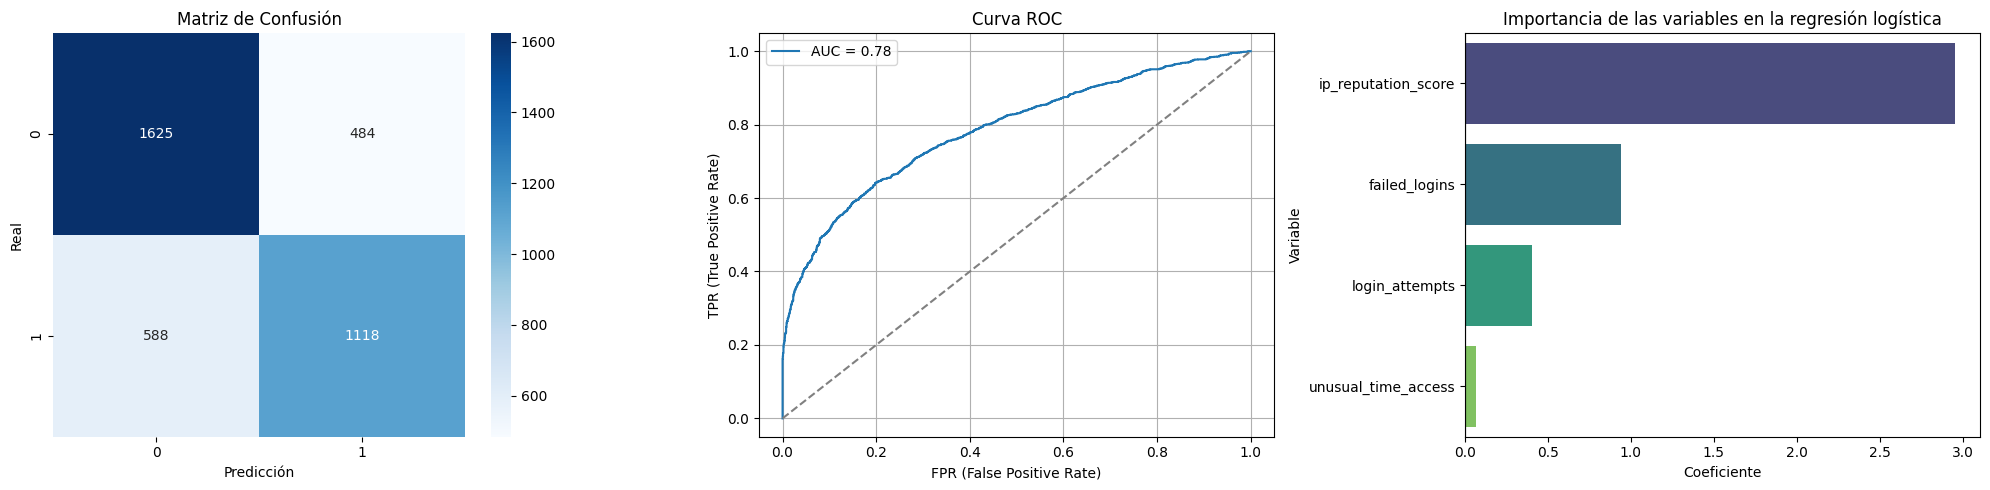

Reporte del modelo de clasificación:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      2109
           1       0.70      0.66      0.68      1706

    accuracy                           0.72      3815
   macro avg       0.72      0.71      0.71      3815
weighted avg       0.72      0.72      0.72      3815



In [54]:

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

#Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")
axes[0].set_title("Matriz de Confusión")

## Curva ROC
y_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_xlabel('FPR (False Positive Rate)')
axes[1].set_ylabel('TPR (True Positive Rate)')
axes[1].set_title('Curva ROC')
axes[1].legend()
axes[1].grid(True)


## Importarncia de las variables en la regresión

coeffs = pd.DataFrame({
    'Variable': x.columns,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

sns.barplot(data=coeffs, x='Coeficiente', y='Variable', palette='viridis', hue='Variable', ax=axes[2])
axes[2].set_title('Importancia de las variables en la regresión logística')
axes[2].axvline(0, color='black', linewidth=0.8)


plt.tight_layout()
plt.show()
print("Reporte del modelo de clasificación:")
print(classification_report(y_test, y_pred))

#### **5.2.- Regresión Logística con Normalización de Datos**

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

#### **Evaluación del Modelo de Regresión Logística con Datos Normalizados**

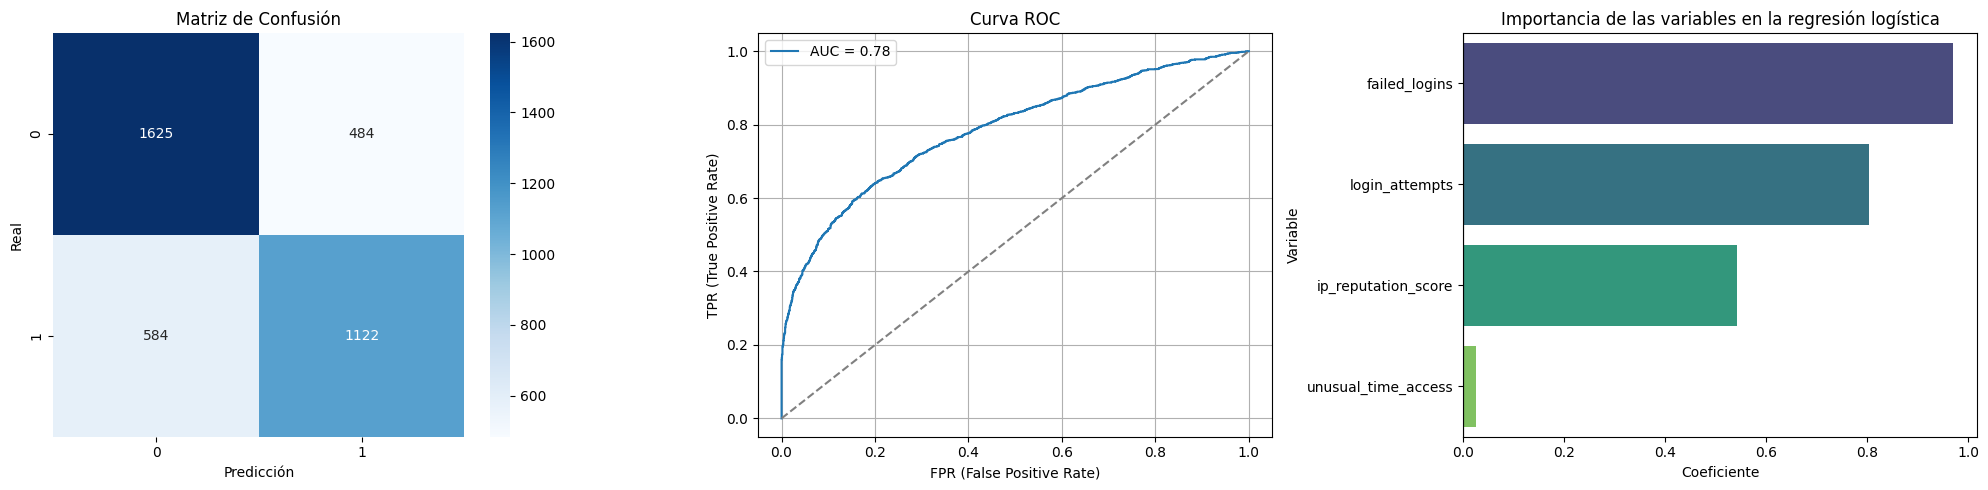

Reporte del modelo de clasificación:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      2109
           1       0.70      0.66      0.68      1706

    accuracy                           0.72      3815
   macro avg       0.72      0.71      0.72      3815
weighted avg       0.72      0.72      0.72      3815



In [56]:

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

#Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")
axes[0].set_title("Matriz de Confusión")

## Curva ROC
y_proba = model.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_xlabel('FPR (False Positive Rate)')
axes[1].set_ylabel('TPR (True Positive Rate)')
axes[1].set_title('Curva ROC')
axes[1].legend()
axes[1].grid(True)


## Importarncia de las variables en la regresión

coeffs = pd.DataFrame({
    'Variable': x.columns,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

sns.barplot(data=coeffs, x='Coeficiente', y='Variable', palette='viridis', hue='Variable', ax=axes[2])
axes[2].set_title('Importancia de las variables en la regresión logística')
axes[2].axvline(0, color='black', linewidth=0.8)


plt.tight_layout()
plt.show()
print("Reporte del modelo de clasificación:")
print(classification_report(y_test, y_pred))

#### **Nota**
En regresión logística no se identifica una diferencia en la precisión en los modelos con normalización y sin normalización, sin embargo en KNeighbors se utilizará escalado para tener una mejor precisión.

#### **5.3.- Modelo KNeighborsClasifier**

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Normalización (si no se ha hecho aún)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Modelado con el K_best
param_grid = {'n_neighbors': list(range(1, 21))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=20, scoring='accuracy')
grid.fit(x_train_scaled, y_train)

knn_model=grid.best_estimator_

print("Mejor k:", grid.best_params_)
print("Mejor score de validación:", grid.best_score_)

pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

Mejor k: {'n_neighbors': 19}
Mejor score de validación: 0.8610657635047879


,mean_test_score,std_test_score,params
0,0.781370,0.021567,{'n_neighbors': 1}
1,0.845683,0.022525,{'n_neighbors': 2}
2,0.824183,0.021301,{'n_neighbors': 3}
3,0.852674,0.017584,{'n_neighbors': 4}
4,0.841836,0.020449,{'n_neighbors': 5}
5,0.858615,0.020094,{'n_neighbors': 6}
6,0.850227,0.020445,{'n_neighbors': 7}
7,0.860017,0.019198,{'n_neighbors': 8}
8,0.856347,0.017690,{'n_neighbors': 9}
9,0.859316,0.018210,{'n_neighbors': 10}


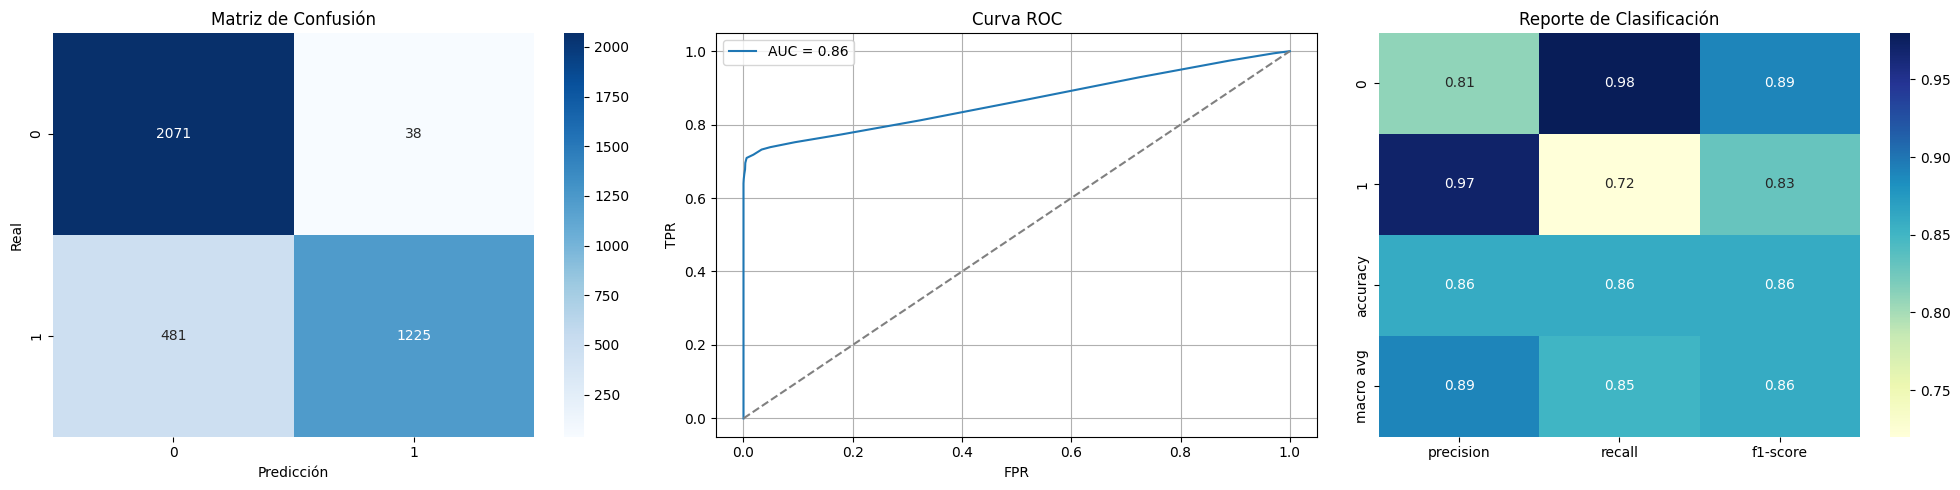

Reporte del modelo de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2109
           1       0.97      0.72      0.83      1706

    accuracy                           0.86      3815
   macro avg       0.89      0.85      0.86      3815
weighted avg       0.88      0.86      0.86      3815



In [58]:
# Predicciones
y_pred_knn = knn_model.predict(x_test_scaled)

# Gráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Matriz de Confusión")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

# Curva ROC
y_proba_knn = knn_model.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = roc_auc_score(y_test, y_proba_knn)
axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title('Curva ROC')
axes[1].set_xlabel('FPR')
axes[1].set_ylabel('TPR')
axes[1].legend()
axes[1].grid(True)

# Reporte de clasificación
report = classification_report(y_test, y_pred_knn, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", ax=axes[2])
axes[2].set_title("Reporte de Clasificación")

plt.tight_layout()
plt.show()

print("Reporte del modelo de clasificación:")
print(classification_report(y_test, y_pred_knn))

#### **Análisis:**
Se predice como ataque 135 que no eran ataques (falsos positivos) y se ignoran 453 ataques clasificandoles como no ataques (falsos negativos). La precición con el modelo KNeighbors es superior al modelo de regresión logística, por lo tanto se utilizará el modelo de KNeighbors para continuar el entrenamiento.

### **6.- Validación Cruzada**

In [59]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

k_range=list(range(1, 20))
best_k=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, x_train, y_train, cv=20, scoring='accuracy')
    best_k.append(scores.mean())
print("OK")
best_kvalue=np.argmax(best_k)+1
print(best_kvalue)

OK
6


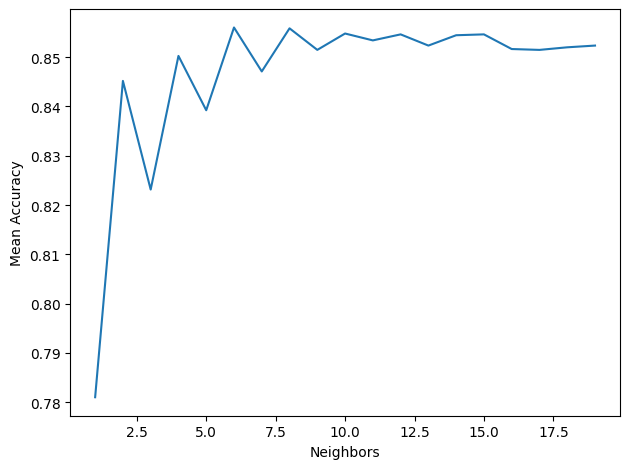

Best Accuracy:0.8559952242879072
Best K value:6
[0.87002096 0.85115304 0.88050314 0.85324948 0.85115304 0.85953878
 0.83228512 0.85953878 0.87002096 0.85534591 0.85744235 0.87002096
 0.8721174  0.85534591 0.87002096 0.86373166 0.8490566  0.8697479
 0.85504202 0.87394958]
0.860964228458679


In [60]:
fig, ax=plt.subplots()
ax.plot(k_range, best_k)
ax.set_xlabel("Neighbors")
ax.set_ylabel("Mean Accuracy")

plt.tight_layout()
plt.show()

print("Best Accuracy:", end='')
print(np.amax(best_k))
print("Best K value:", end='')
print(best_kvalue)


knn_cv=KNeighborsClassifier(n_neighbors=best_kvalue)
#knn_cv=KNeighborsClassifier(n_neighbors=5)

scores=cross_val_score(knn_cv, x, y, cv=20, scoring='accuracy')
print(scores)
print(scores.mean())

In [61]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression(solver='liblinear')
score_log=cross_val_score(log_model, x, y, cv=10, scoring='accuracy')
print(score_log.mean())

0.7286393404035805


### **7.- Ajuste de Clases**

Se utilizará el modelo de knn con el best_k, que es el modelo que mejor presición tiene y que se ajusta con la validación cruzada como modelo para ajustar las clases.

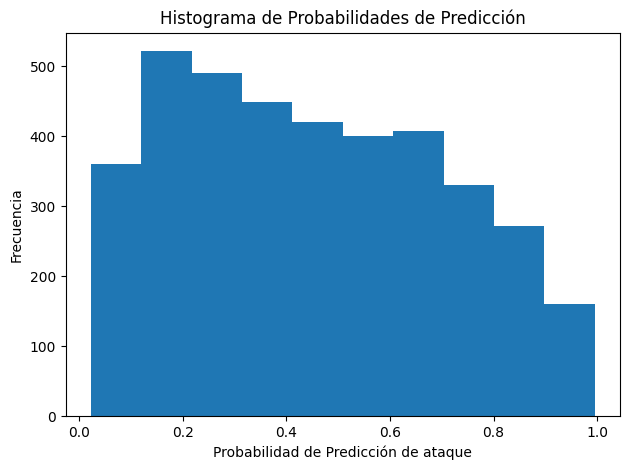

In [62]:
final_model=grid.best_estimator_

yf_pred = final_model.predict(x_test_scaled)
yf_prob = final_model.predict_proba(x_test_scaled)[:, 1]

fig, ax =plt.subplots();

ax.hist(y_proba)
ax.set_title("Histograma de Probabilidades de Predicción")
ax.set_xlabel("Probabilidad de Predicción de ataque")
ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()




In [63]:
from sklearn.preprocessing import binarize

yf_pred_class=binarize([yf_prob], threshold=0.4)[0]
pd.DataFrame([yf_pred_class[:10], yf_prob[:10]])

cmf=confusion_matrix(y_test, yf_pred_class)
print(cm)
print(cmf)
mean_auc=cross_val_score(final_model, x, y, cv=10, scoring='roc_auc').mean()

[[2071   38]
 [ 481 1225]]
[[2006  103]
 [ 446 1260]]


## Decisión

Al bajar un poco el umbral la cantidad de falsos positivos se dispara. Esto puede provocar que múltiples clientes legítimos se queden sin conectividad. En tal circunstancia, para priorizar el servicio y dado que se tiene un modelo con un ajuste bueno y muy cercano a la validación cruzada, además de un área bajo la curva superior a 0.7 (0.85), se mantiene el umbral por defecto de 0.5, por lo que no se utilizará un ajuste por clases para predecir.